# Titanic Data Set:
#### The sinking of the Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew. While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

#### In this challenge, I build a ANN model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error, roc_auc_score

In [2]:
df = pd.read_csv('titanic.csv')
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Visualizing target class distribution

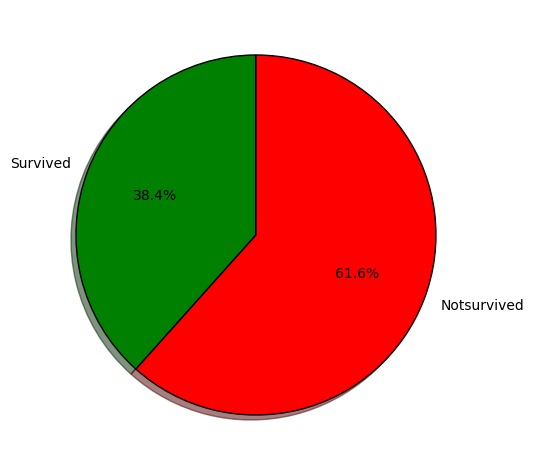

In [4]:
Survival = df[df['Survived'] == 1].shape[0]
Notsurvival = df[df['Survived'] == 0].shape[0]

class_ = [Survival, Notsurvival]
label = ['Survived', 'Notsurvived']

plt.pie(class_, labels = label, shadow = True, wedgeprops = {'edgecolor': 'black'},
        autopct = '%1.1f%%', startangle= 90, colors=['green', 'red'])

plt.tight_layout()
plt.show()

In [5]:
df = df.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis = 1)
df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S


In [6]:
print(df.columns)
df.head()

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [7]:
df.shape

(891, 8)

## Handle missing values

In [8]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

### for int columns

In [9]:
# Missing value of age cols
df = df.interpolate(method='nearest')

### for categorical column

In [10]:
# missing value of Embarked cols
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [11]:
df.head().isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

### Define Predictor and Target Attributes

In [12]:
X = df.iloc[:, 1:]
Y = df.iloc[:, 0]

#### Predictor Attributes

In [13]:
X.tail()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
886,2,male,27.0,0,0,13.00,S
887,1,female,19.0,0,0,30.00,S
888,3,female,19.0,1,2,23.45,S
889,1,male,26.0,0,0,30.00,C
890,3,male,32.0,0,0,7.75,Q


#### Target attribute

In [14]:
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

## One Hot Encoder (Sex, Embarked)

In [15]:
X = pd.get_dummies(X,drop_first = True)
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


## Split the Data into Training and Testing

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(
                                                    X,
                                                    Y,
                                                    test_size=0.2,
                                                    random_state=0)

## Training Data

In [17]:
print("X_train", X_train.shape)
print("Y_train", Y_train.shape)

X_train (712, 8)
Y_train (712,)


### Testing Data

In [18]:
print("X_test", X_test.shape)
print("X_test", Y_test.shape)

X_test (179, 8)
X_test (179,)


# Build Artificial Neural Network

In [19]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [20]:
pip install scikeras

Note: you may need to restart the kernel to use updated packages.


In [21]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# from keras.layers import Dropout
from scikeras.wrappers import KerasClassifier

In [22]:
def build_ANN():
    # Initialize our ANN model
    ANN_Keras = Sequential()

    # Add the input layer and first hidden layer with Dropout
    ANN_Keras.add(Dense(5,  kernel_initializer = 'uniform', activation = 'relu' , input_dim = 8))
    # ANN_Keras.add(Dropout(rate = 0.1))

    # Adding the Second Hidden layer with Dropout
    ANN_Keras.add(Dense(5, kernel_initializer= 'uniform', activation = 'relu'))
    # ANN_Keras.add(Dropout(rate = 0.1))

    # Adding the output layer
    ANN_Keras.add(Dense(1, kernel_initializer= 'uniform', activation = 'sigmoid'))

    # Compiling the ANN
    ANN_Keras.compile(optimizer= 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return ANN_Keras

ANN_Keras = KerasClassifier(model= build_ANN, batch_size = 10, epochs = 100)
Accuracies_Train_Data = cross_val_score(estimator = ANN_Keras, X = X_train, y = Y_train, cv = 10, n_jobs= -1)
Accuracies_Train_Data

array([0.77777778, 0.73611111, 0.84507042, 0.77464789, 0.78873239,
       0.78873239, 0.81690141, 0.77464789, 0.83098592, 0.84507042])

### Predict the Test Data

In [24]:
from sklearn.model_selection import cross_val_predict

In [25]:
Y_pred_keras = cross_val_predict(ANN_Keras, X_test, Y_test, cv = 10)



Epoch 1/100


17/17 [==============================] - 3s 6ms/step - loss: 0.6923 - accuracy: 0.6149
Epoch 2/100
17/17 [==============================] - 0s 4ms/step - loss: 0.6906 - accuracy: 0.6149
Epoch 3/100
17/17 [==============================] - 0s 5ms/step - loss: 0.6888 - accuracy: 0.6149
Epoch 4/100
17/17 [==============================] - 0s 5ms/step - loss: 0.6868 - accuracy: 0.6149
Epoch 5/100
17/17 [==============================] - 0s 6ms/step - loss: 0.6841 - accuracy: 0.6149
Epoch 6/100
17/17 [==============================] - 0s 6ms/step - loss: 0.6786 - accuracy: 0.6398
Epoch 7/100
17/17 [==============================] - 0s 5ms/step - loss: 0.6720 - accuracy: 0.6832
Epoch 8/100
17/17 [==============================] - 0s 5ms/step - loss: 0.6615 - accuracy: 0.6894
Epoch 9/100
17/17 [==============================] - 0s 4ms/step - loss: 0.6509 - accuracy: 0.7019
Epoch 10/100
17/17 [==============================] - 0s 5ms/step - loss: 0.6413 - accuracy: 0.6770
Epoch

In [26]:
Y_pred_keras

array([0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0], dtype=int64)

## Accuracy Score

In [27]:
Accuracy_Keras = cross_val_score(ANN_Keras, X = X_test, y = Y_test, cv = 10)

Epoch 1/100
17/17 [==============================] - 2s 5ms/step - loss: 0.6920 - accuracy: 0.6522
Epoch 2/100
17/17 [==============================] - 0s 4ms/step - loss: 0.6895 - accuracy: 0.6522
Epoch 3/100
17/17 [==============================] - 0s 5ms/step - loss: 0.6865 - accuracy: 0.6584
Epoch 4/100
17/17 [==============================] - 0s 4ms/step - loss: 0.6829 - accuracy: 0.6894
Epoch 5/100
17/17 [==============================] - 0s 5ms/step - loss: 0.6779 - accuracy: 0.6894
Epoch 6/100
17/17 [==============================] - 0s 5ms/step - loss: 0.6704 - accuracy: 0.6832
Epoch 7/100
17/17 [==============================] - 0s 5ms/step - loss: 0.6606 - accuracy: 0.7081
Epoch 8/100
17/17 [==============================] - 0s 5ms/step - loss: 0.6516 - accuracy: 0.7143
Epoch 9/100
17/17 [==============================] - 0s 6ms/step - loss: 0.6413 - accuracy: 0.7143
Epoch 10/100
17/17 [==============================] - 0s 4ms/step - loss: 0.6315 - accuracy: 0.7019
Epoch 11/

In [28]:
Accuracy_Keras = Accuracy_Keras.mean()
print('Accuracy Score:', Accuracy_Keras)

Accuracy Score: 0.7656862745098039


### Evaluate the Results

<Axes: >

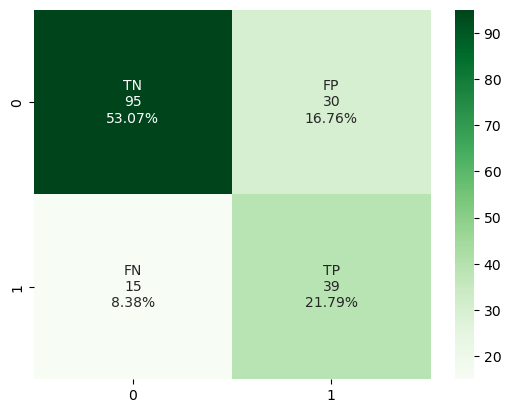

In [29]:
confusion_matrix = confusion_matrix(Y_pred_keras, Y_test)

#[row, column]
TP = confusion_matrix[1, 1]
TN = confusion_matrix[0, 0]
FP = confusion_matrix[0, 1]
FN = confusion_matrix[1, 0]

group_names = ['TN','FP','FN','TP']

group_counts = ["{0:0.0f}".format(value) for value in confusion_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in confusion_matrix.flatten()/np.sum(confusion_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

sns.heatmap(confusion_matrix, annot=labels, fmt='', cmap='Greens')

In [30]:
# Accuracy Score
Accuracy = accuracy_score(Y_pred_keras, Y_test)
print('Accuracy Score:', Accuracy)

# Precision Score
Precision = precision_score(Y_pred_keras, Y_test)
print('Precision Score:', Precision)

# True positive Rate (TPR) or Sensitivity or Recall
TPR = recall_score(Y_pred_keras, Y_test)
print('True positive Rate:', TPR)

# False positive Rate (FPR)
FPR = FP / float(TN + FP)
print('False positive Rate', FPR)

# F1 Score or F-Measure or F-Score
F1 = f1_score(Y_pred_keras, Y_test)
print('F1 Score:', F1)

# Specificity
Specificity = TN / (TN + FP)
print('Specificity:', Specificity )

# Mean Absolute Error
Error = mean_absolute_error(Y_pred_keras, Y_test)
print('Mean Absolute Error:', Error)

# ROC Area
Roc = roc_auc_score(Y_pred_keras, Y_test)
print('ROC Area:', Roc)

Accuracy Score: 0.7486033519553073
Precision Score: 0.5652173913043478
True positive Rate: 0.7222222222222222
False positive Rate 0.24
F1 Score: 0.6341463414634146
Specificity: 0.76
Mean Absolute Error: 0.25139664804469275
ROC Area: 0.7411111111111112


## Visualize the Results

<BarContainer object of 8 artists>

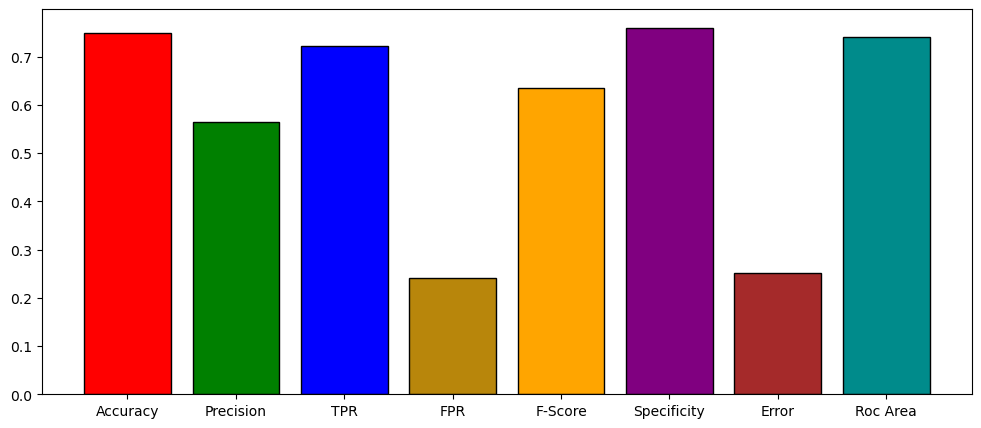

In [31]:
plt.figure(figsize = (12, 5))

result = [Accuracy, Precision, TPR, FPR, F1, Specificity, Error, Roc]
label = ["Accuracy", "Precision", "TPR", "FPR", "F-Score", "Specificity", "Error", "Roc Area"]
colors=[ 'red', 'green', 'blue', 'darkgoldenrod', 'orange', 'purple', 'brown', 'darkcyan']

plt.bar(label, result, color = colors, edgecolor='black')